In [1]:
from newspaper import Article

# Provide the URL of the article you want to summarize
article_url = "https://timesofindia.indiatimes.com/city/chandigarh/1971-war-martyrs-son-tries-to-trace-father-in-pakistan-jails/articleshow/57337205.cms"

# Create an Article object and download the article
article = Article(article_url)
article.download()

# Parse the article
article.parse()

# Perform text summarization
article.nlp()

# Get the summary
summary = article.summary

# Print the summary
print(summary)

Havildar Dharampal Singh was posted in Dhaka, Bangladesh, with 4 Sikh Regiment during the war when he was taken prisoner by Pakistan Army, said Dharampal’s son, Arshinderpal Singh.Dharampal hails from Lehra Dhulkot village of Bathinda district.
“Initially, we were informed that my father went missing, but sometime around 1977-78 we were told that he had achieved martyrdom.
We started getting his pension after that,” Arshinderpal said.He said an Indian soldier who was released by Pakistan in 1986, Satish Kumar, informed him that Dharampal and he were tortured together in Pakistan.
“I know my father must be old and feeble, but it is important for all of us to know where he is.
On contacting Sheikh, he encouraged and we are hoping something would come off it now,” he said.


Please enter the URL of the news article:  https://timesofindia.indiatimes.com/city/chandigarh/1971-war-martyrs-son-tries-to-trace-father-in-pakistan-jails/articleshow/57337205.cms


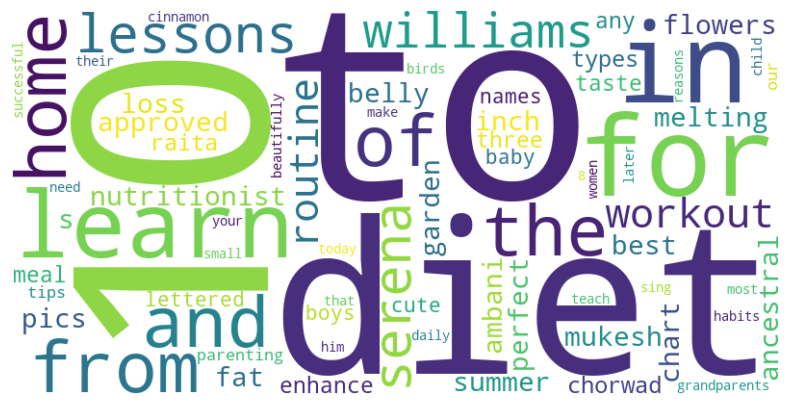

In [2]:
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

def get_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return text

def process_text(text):
    words = re.findall(r'\w+', text.lower())
    return words

def create_wordcloud(words):
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def summarize(url):
    text = get_text(url)
    words = process_text(text)
    word_freq = Counter(words)
    create_wordcloud(word_freq)

# Test the function
url = input("Please enter the URL of the news article: ")
summarize(url)
